In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import statsmodels.api as sm

import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

%matplotlib inline

In [2]:
gdata = pd.read_csv('google_data.csv')

In [3]:
gdata.head()

,date,4. close,2. high,1. open,3. low,5. volume
0,2004-08-19,100.34,104.06,100.0000,95.96,44659000.0
1,2004-08-20,108.31,109.08,101.4800,108.31,22834300.0
2,2004-08-23,109.40,113.48,110.7698,109.40,18256100.0
3,2004-08-24,104.87,111.60,111.2400,104.87,15247300.0
4,2004-08-25,106.00,108.00,104.9600,106.00,9188600.0


In [4]:
gdata.isnull().any()

date         False
4. close     False
2. high      False
1. open      False
3. low       False
5. volume    False
dtype: bool

In [5]:
cols = ['2. high','1. open','3. low','5. volume']

gdata.drop(cols,inplace=True,axis=1)

In [6]:
from datetime import datetime

def convert(x):
    return datetime.strptime(x,"%Y-%m-%d")


gdata['date'] = gdata['date'].apply(convert)

In [7]:
gdata.head()
gdata.rename(mapper={"4. close":"close"},axis=1,inplace=True)

In [8]:
gdata = gdata.set_index('date')
gdata.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19',
               '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-26', '2019-08-27'],
              dtype='datetime64[ns]', name='date', length=3782, freq=None)

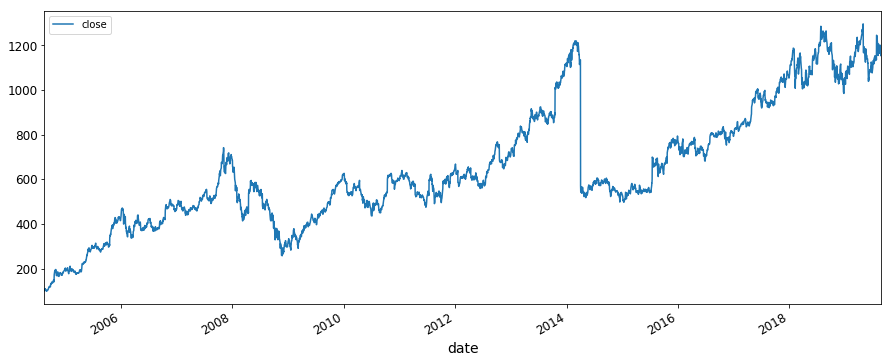

In [9]:
gdata.plot(figsize=(15, 6))

In [10]:
gdata.shape

(3782, 1)

In [11]:
gdata = gdata.asfreq('D')

In [12]:
gdata.shape

(5487, 1)

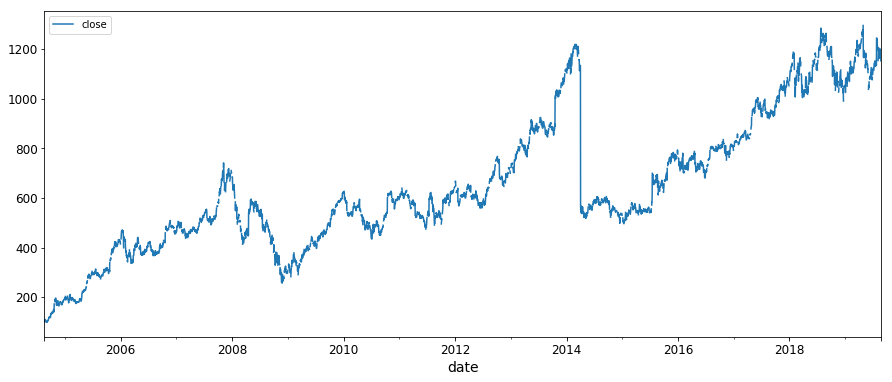

In [13]:
gdata.plot(figsize=(15, 6))

In [14]:
# linear interpolation
gdata['close'] = gdata['close'].interpolate()

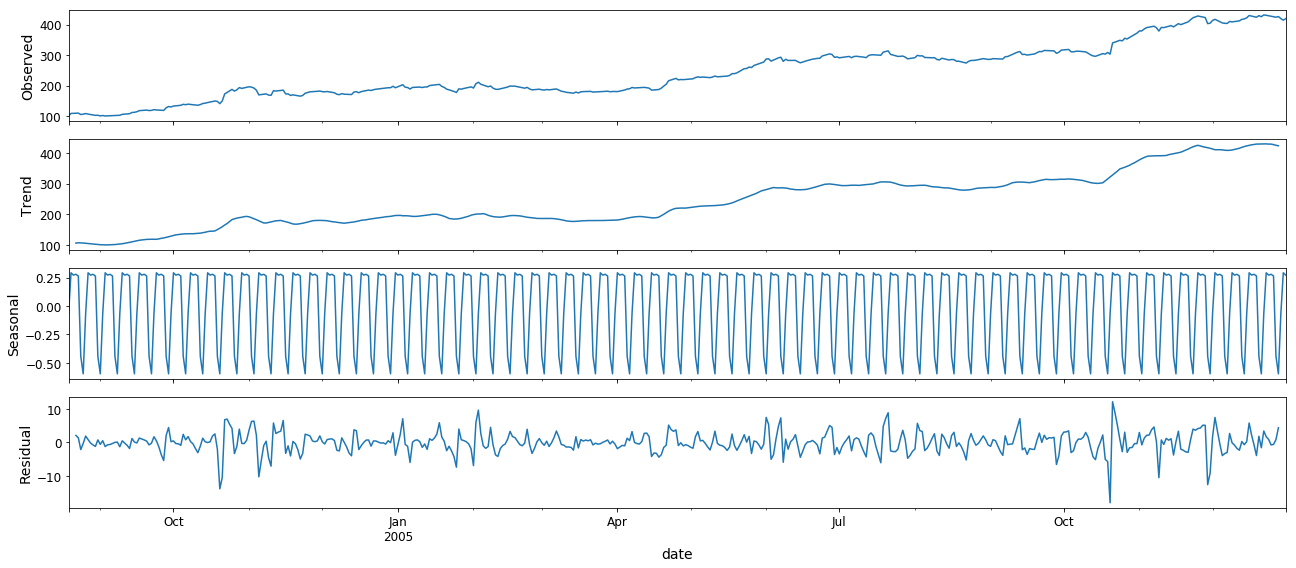

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(gdata[0:500], model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
import itertools
p = q = d = range(2)
pqd = list(itertools.product(p,q,d))
seasonal_pqd = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [17]:
for param in pqd:
    for sea_param in seasonal_pqd:
        try:
            model = sm.tsa.statespace.SARIMAX(gdata,order=param,seasonal_order=sea_param,enforce_invertibility=False,
                                      enforce_stationarity=False)
            res = model.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, sea_param, res.aic))
        except:
            continue

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:87463.28833947414
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:80214.0862446501
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:56416.30508564413
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:56304.47518142032
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:56425.03102272753
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:56416.1751146706
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:56313.584943558744
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:56303.65419982755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:79970.41197073125
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:72879.746450305
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:51347.90610717471
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:51199.80239585665
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:51366.89889679603


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:51302.19050347822
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:51215.139687904855
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:51197.94041202568
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:42433.45075646965
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:42354.30468222622
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:46145.54112299644
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:42311.87251443832
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:42361.075192712495
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:42356.29939845113
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:44410.96384615329
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:42313.80248864703
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:42410.5746661789
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:42331.43626934586
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:46125.53263580535
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:42288.68714209997
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:42344.95300938557
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:42333.427127423616
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:44400.66732193557
ARIMA(0,

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:42369.09194932612


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:45941.32382732317


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:42316.92474113048
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:42362.80282894282
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:42370.00128578968
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:44290.64270983805
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:42318.85412796876
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:42419.132271027076


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:42356.69884882709
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:45891.34917355598
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:42293.28180622297
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:42346.771620175175
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:42341.99347351276
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:44266.074703619204
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:42295.19428951095
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:42417.53983095973
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:42338.416858058314
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:46133.235209923536
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:42296.03452041567
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:42338.4157209397
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:42340.4079560742
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:44393.68873147761
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:42297.942186847584
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:42412.27747049529
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:42333.13884828742
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:46127.011271684656
ARIMA(

In [20]:
mod = sm.tsa.SARIMAX(gdata,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,enforce_stationarity=False)

res = mod.fit()

In [21]:
res.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.1621,0.286,-0.567,0.570,-0.722,0.398
ma.L1,0.2196,0.282,0.778,0.437,-0.334,0.773
ar.S.L12,-0.0020,0.019,-0.106,0.916,-0.038,0.034
ma.S.L12,-1.0060,0.003,-297.207,0.000,-1.013,-0.999
sigma2,132.4318,0.922,143.573,0.000,130.624,134.240


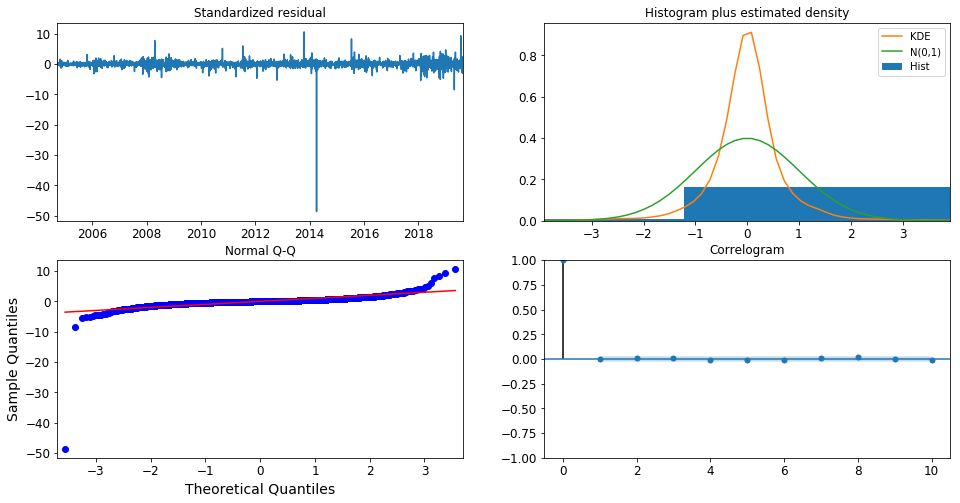

In [22]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

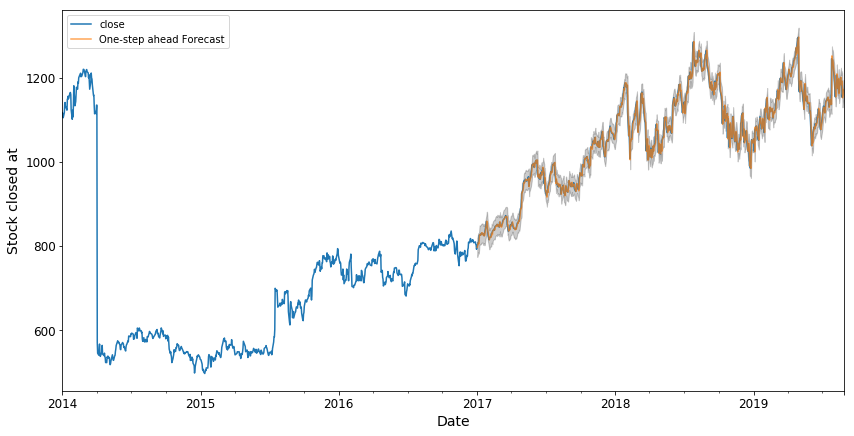

In [23]:
preds = res.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = preds.conf_int()

ax = gdata['2014':].plot(label='observed')
preds.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock closed at')
plt.legend()
plt.show()

In [24]:
res.save('google_sarima.pkl')

In [5]:
#loaded = ARIMAResults.load('model.pkl')
from statsmodels.tsa.arima_model import ARIMAResults
res = ARIMAResults.load('google_sarima.pkl')

In [3]:
import time

st = time.time()

y_pred = res.get_prediction(start=pd.to_datetime('2017-01-01'),end=pd.to_datetime('2019-08-30'),dynamic=False)
#y_true = gdata[pd.to_datetime('2017-01-01'):]

et = time.time()

print(et-st)


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


0.3768489360809326


In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred.predicted_mean,y_true)

155.60912585437575

In [4]:
y_pred.predicted_mean

2017-01-01     796.774648
2017-01-02     800.641561
2017-01-03     805.481656
2017-01-04     808.168101
2017-01-05     804.604830
2017-01-06     813.488811
2017-01-07     826.571450
2017-01-08     826.054694
2017-01-09     826.378983
2017-01-10     827.586181
2017-01-11     827.076318
2017-01-12     830.704506
2017-01-13     829.558663
2017-01-14     831.309937
2017-01-15     831.172250
2017-01-16     829.136956
2017-01-17     825.218029
2017-01-18     827.623253
2017-01-19     829.844495
2017-01-20     824.372308
2017-01-21     828.240906
2017-01-22     834.211469
2017-01-23     840.394777
2017-01-24     845.295198
2017-01-25     849.879506
2017-01-26     859.185909
2017-01-27     857.964569
2017-01-28     844.350647
2017-01-29     834.655001
2017-01-30     830.780860
                 ...     
2019-08-01    1217.061437
2019-08-02    1211.387465
2019-08-03    1196.223708
2019-08-04    1181.370907
2019-08-05    1168.373914
2019-08-06    1154.517921
2019-08-07    1173.724350
2019-08-08  

In [5]:
# pip install statsmodels

from statsmodels.tsa.arima_model import ARIMAResults

res = ARIMAResults.load('google_sarima.pkl')

def predict(date):
    pred = res.get_prediction(end=pd.to_datetime(date),dynamic=False)
    return pred.predicted_mean[-1]

In [6]:
predict('2019-08-31')

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1172.9698180708042